In [ ]:
#1.	Load and explore the training dataset. Explain the steps that you have taken.  (6 marks)

In [55]:
import pandas as pd
train_data= pd.read_csv("ac_train_data.csv")
test_data= pd.read_csv("ac_test_data.csv")

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417720 entries, 0 to 417719
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  417720 non-null  int64  
 1   load        417720 non-null  float64
 2   ac          417720 non-null  int64  
 3   hourofday   417720 non-null  int64  
 4   dayofweek   417720 non-null  object 
 5   dif         417720 non-null  float64
 6   absdif      417720 non-null  float64
 7   max         417720 non-null  float64
 8   var         417720 non-null  float64
 9   entropy     417720 non-null  float64
 10  nonlinear   417720 non-null  float64
 11  hurst       417720 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 38.2+ MB


In [57]:
train_data.isnull().sum().sort_values(ascending=False)

Unnamed: 0    0
load          0
ac            0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
dtype: int64

In [58]:
train_data.dtypes

Unnamed: 0      int64
load          float64
ac              int64
hourofday       int64
dayofweek      object
dif           float64
absdif        float64
max           float64
var           float64
entropy       float64
nonlinear     float64
hurst         float64
dtype: object

In [59]:
train_data.head()

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,105541,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,105542,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,105543,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,105544,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,105545,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


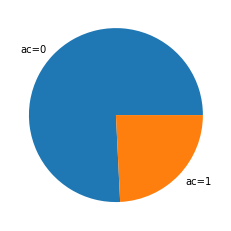

In [60]:
# Use pie chart to demonstrate if the dataset is a balanced dataset.

import matplotlib.pyplot as plt
import numpy as np

y = train_data['ac']

y_0 = 0
y_1 = 0

for i in range(len(y)):
    if y[i] == 0:
        y_0 += 1
    elif y[i] == 1:
        y_1 += 1

ac_count = [y_0,y_1]

plt.pie(ac_count,labels=['ac=0','ac=1'])
plt.show()

<AxesSubplot:xlabel='dayofweek'>

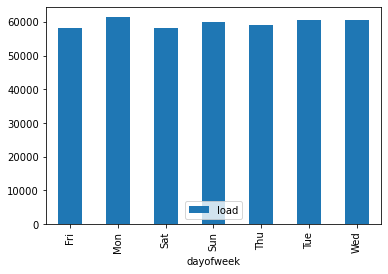

In [61]:
group = train_data.groupby(['dayofweek'])
data_count = group.agg({'load':'count'})

data_count.plot.bar()

<AxesSubplot:xlabel='dayofweek,ac'>

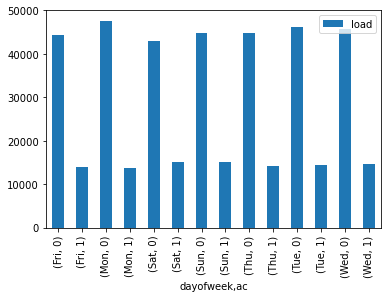

In [62]:
group = train_data.groupby(['dayofweek','ac'])
data_count = group.agg({'load':'count'})

data_count.plot.bar(label='count')

<AxesSubplot:xlabel='hourofday'>

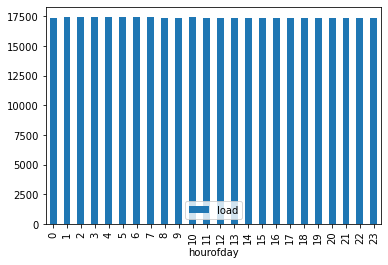

In [63]:
group = train_data.groupby(['hourofday'])
data_count = group.agg({'load':'count'})

data_count.plot.bar(label='count')

<AxesSubplot:xlabel='hourofday,ac'>

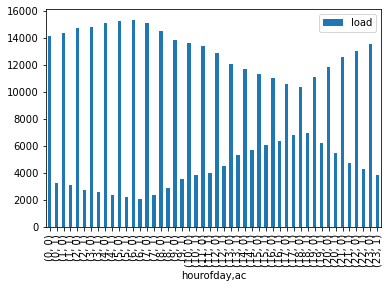

In [64]:
group = train_data.groupby(['hourofday','ac'])
data_count = group.agg({'load':'count'})

data_count.plot.bar(label='count')

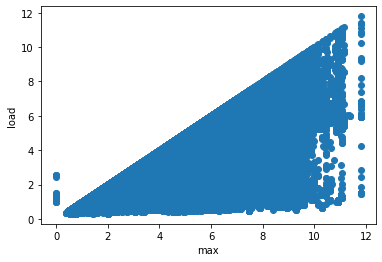

In [65]:
x = train_data['max']
y = train_data['load']

plt.scatter(x,y)
plt.xlabel('max')
plt.ylabel('load')
plt.show()

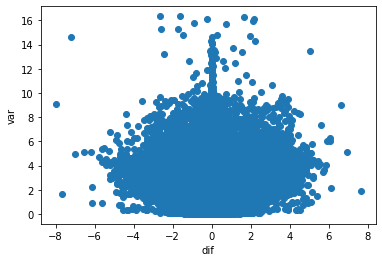

In [66]:
x = train_data['dif']
y = train_data['var']

plt.scatter(x,y)
plt.xlabel('dif')
plt.ylabel('var')
plt.show()

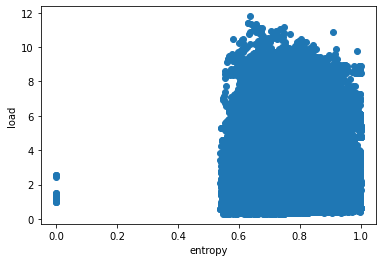

In [67]:
x = train_data['entropy']
y = train_data['load']

plt.scatter(x,y)
plt.xlabel('entropy')
plt.ylabel('load')
plt.show()

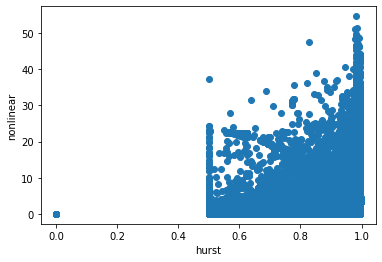

In [68]:
x = train_data['hurst']
y = train_data['nonlinear']

plt.scatter(x,y)
plt.xlabel('hurst')
plt.ylabel('nonlinear')
plt.show()

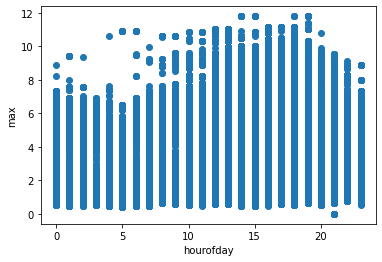

In [69]:
x = train_data['hourofday']
y = train_data['max']

plt.scatter(x,y)
plt.xlabel('hourofday')
plt.ylabel('max')
plt.show()

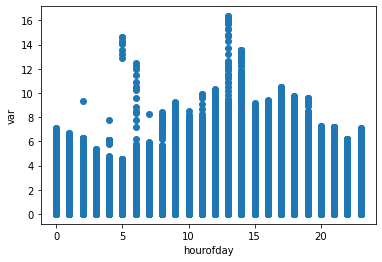

In [70]:
x = train_data['hourofday']
y = train_data['var']

plt.scatter(x,y)
plt.xlabel('hourofday')
plt.ylabel('var')
plt.show()

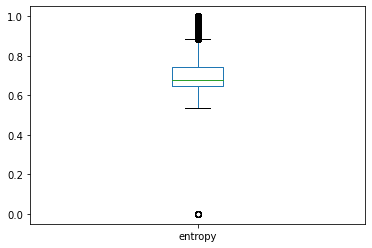

In [71]:
y = train_data['entropy']

pd.DataFrame(y).plot.box()
plt.show()

# The larger the entropy, the more complex the fluctuations of the whole time series will be, the lower the entropy, the purer the information will be.

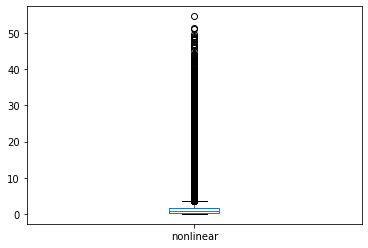

In [72]:
y = train_data['nonlinear']

pd.DataFrame(y).plot.box()
plt.show()

# The nonlinearity coefficient are very small values mostly close to 0.

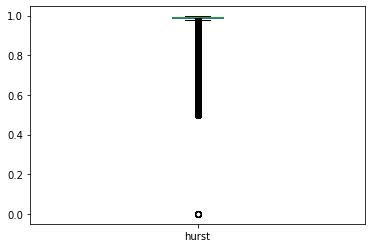

In [73]:
y = train_data['hurst']

pd.DataFrame(y).plot.box()
plt.show()

# The husrt value is between 0.5 and 1, which indicates the presence of long-term memory in the time series.

In [74]:
#2.	Analyse the importance of the features for predicting air conditioner status using two different approaches.		

In [75]:
test_data= pd.read_csv("ac_test_data.csv")

predictors = ['load','hourofday','dif','absdif','max','var','entropy','nonlinear','hurst']
response = ['ac']

In [76]:
def runLRmodel(trials, train_data, test_data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,10])

   for i in range(0,trials):
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type,solver='liblinear')
      lr.fit(train_data[predictors], train_data[label])
      y_predict = lr.predict(test_data[predictors])
      model_acc += accuracy_score(y_predict, test_data[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [ ]:
# Please uncomment the following two blocks to run the code, as it will take a long period of time to get the results.

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# alpha_vals = [.0001,.001,.005,.01,.1,10]
# l1_acc = np.zeros(len(alpha_vals))
# index = 0
# #L1 regularization
# for l in alpha_vals:
#    l1_acc[index], w = runLRmodel(100,train_data,test_data, predictors, 'ac', 'l1', np.float(l))
#    index += 1

# print("Acc: {}".format(l1_acc))
# # penalty at which validation accuracy is maximum
# max_index_l1  = np.argmax(l1_acc)
# best_alpha = alpha_vals[max_index_l1]
# print("Best Alpha: {}".format(best_alpha))

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# lambda_vals = [.0001,.001,.005,.01,.1,10]
# l2_acc = np.zeros(len(lambda_vals))
# index = 0
# #L2 regularization
# for l in lambda_vals:
#    l2_acc[index], w = runLRmodel(100,train_data,test_data, predictors, 'ac', 'l2', np.float(l))
#    index += 1

# print("Acc: {}".format(l2_acc))
# # penalty at which validation accuracy is maximum
# max_index_l2  = np.argmax(l2_acc)
# best_lambda = lambda_vals[max_index_l2]
# print("Best Lambda: {}".format(best_lambda))

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

alpha_val = 0.1

lr = LogisticRegression(C=1/alpha_val, penalty='l1', solver='liblinear')
lr.fit(train_data[predictors], train_data[response])
y_predict = lr.predict(test_data[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, test_data[response])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy is: 0.9842050407428463
Model Coeff: [-1.42151812  2.58478002 -0.08544705 -0.02655356  0.89255495 -0.40847034
  0.79106652 -8.21233036  0.0317255  -1.37363197]


In [78]:
lambda_val = 0.1

lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(train_data[predictors], train_data[response])
y_predict = lr.predict(test_data[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, test_data[response])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy is: 0.9842524161455373
Model Coeff: [-1.3550047   2.57784366 -0.08528163 -0.02592822  0.90300664 -0.40091735
  0.78539821 -8.2752265   0.03430877 -1.41485444]


C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#3.	Based on the training data, create three supervised machine learning (ML) models except any ensemble approach for predicting air conditioner status.     

In [40]:
from time import time

X = np.array(train_data[['absdif','entropy']])
y = np.array(train_data['ac'])

In [41]:
print ("unique labels: {}".format(np.unique(y)))

unique labels: [0 1]


In [42]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

print (Xtrain.shape)
print (ytrain.shape)
print (Xtest.shape)
print (ytest.shape)


(334176, 2)
(334176,)
(83544, 2)
(83544,)


In [43]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [44]:
#KNN

KNN Training Accuracy: 0.999988030259504


<ipython-input-43-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


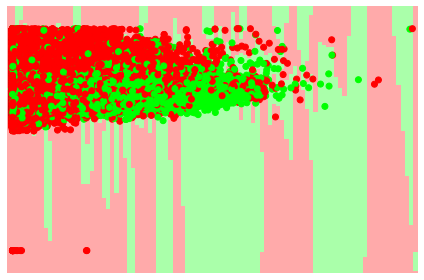

KNN Testing Accuracy: 0.690247055443838


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Training Accuracy: 0.8445968591400939


<ipython-input-43-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


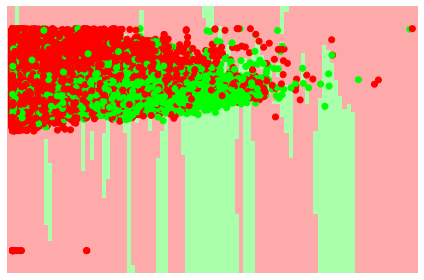

KNN Testing Accuracy: 0.7482284784065881
Running time: 25.02823543548584


In [46]:
time_1 = time()
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))
time_2 = time()

print("Running time:",time_2-time_1)

KNN Training Accuracy: 0.8446028440103418


<ipython-input-6-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


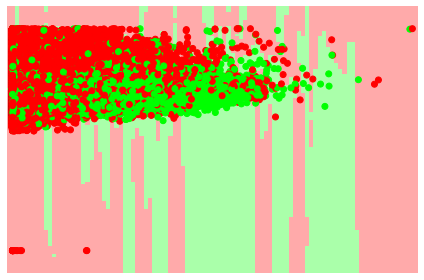

KNN Testing Accuracy: 0.7253423345781863


In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Training Accuracy: 0.8150675093363976


<ipython-input-6-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


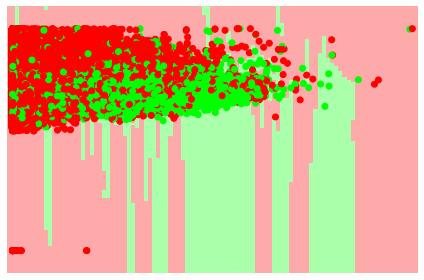

KNN Testing Accuracy: 0.7528248587570622


In [11]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Training Accuracy: 0.8152889495355741


<ipython-input-6-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


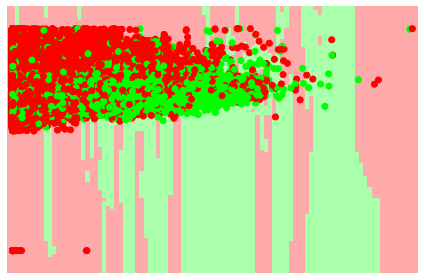

KNN Testing Accuracy: 0.73990950876185


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Training Accuracy: 0.791367423154266


<ipython-input-6-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


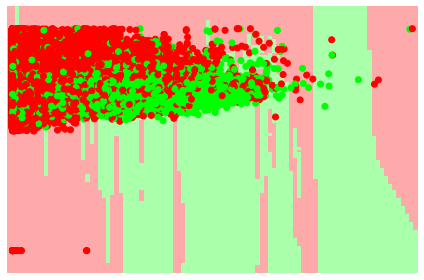

KNN Testing Accuracy: 0.7623647419323949


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Training Accuracy: 0.7859780474959303


<ipython-input-6-c257b77bd245>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


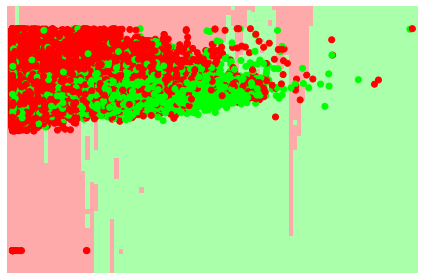

KNN Testing Accuracy: 0.7603298860480705


In [14]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(Xtrain, ytrain)

knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

plot_estimator(knn_model, Xtrain, ytrain)
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

In [47]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

eva_train = []
eva_test = []

In [48]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700523077659677
Testing accuracy : 0.7715694723738389


In [49]:
time_1 = time()
lambda_val = 0.0001
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))
time_2 = time()
print("Running time:",time_2-time_1)
eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700582926362156
Testing accuracy : 0.7715694723738389
Running time: 0.4024946689605713


In [33]:
lambda_val = 0.001
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700582926362156
Testing accuracy : 0.7715694723738389


In [34]:
lambda_val = 0.01
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700582926362156
Testing accuracy : 0.7715694723738389


In [35]:
lambda_val = 0.1
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700582926362156
Testing accuracy : 0.7715694723738389


In [36]:
lambda_val = 1
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700523077659677
Testing accuracy : 0.7715694723738389


In [37]:
lambda_val = 10
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7700283682849756
Testing accuracy : 0.7715575026333429


In [38]:
lambda_val = 1000
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Xtrain, ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, lr.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, lr.predict(Xtest))))

eva_train.append(accuracy_score(ytrain, lr.predict(Xtrain)))
eva_test.append(accuracy_score(ytest, lr.predict(Xtest)))

Training accuracy: 0.7677062386287465
Testing accuracy : 0.7695705257110026


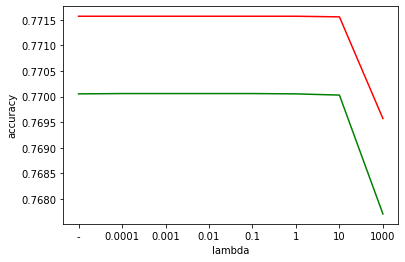

In [39]:
x = ['-',0.0001,0.001,0.01,0.1,1,10,1000]

plt.plot(x,eva_train,color='green',label = 'training accuracy')
plt.plot(x,eva_test,color='red',label = 'testing accuracy')
plt.xlabel('lambda')
plt.ylabel('accuracy')
plt.show()

In [51]:
#SVM

from sklearn import svm
from sklearn.metrics import classification_report


In [52]:
time_1 = time()
model = svm.SVC(kernel='rbf',class_weight={1:3})
model.fit(Xtrain,ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, model.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, model.predict(Xtest))))
time_2 = time()
print("Running time:",time_2-time_1)

Training accuracy: 0.7160957100450063
Testing accuracy : 0.7185914009384277
Running time: 19596.04470348358


In [53]:
model = svm.SVC(kernel='linear',class_weight={1:3})
model.fit(Xtrain,ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, model.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, model.predict(Xtest))))

Training accuracy: 0.46622737719046253
Testing accuracy : 0.46467729579622713


In [54]:
model = svm.SVC(kernel='poly',class_weight={1:3})
model.fit(Xtrain,ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, model.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, model.predict(Xtest))))

Training accuracy: 0.45154349803696253
Testing accuracy : 0.44957148329024227


In [ ]:
# 4.	Given the same training and test data, build three ensemble models for predicting air conditioner status (6 Marks) 


In [ ]:
#Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

time_1 = time()
rfclf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=42)
rfclf.fit(Xtrain,ytrain)
time_2 = time()
print("Training accuracy: {}".format(accuracy_score(ytrain, rfclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, rfclf.predict(Xtest))))

print("Running time:",time_2-time_1)

Training accuracy: 0.7712014028535862
Testing accuracy : 0.7723714449870727
Running time: 27.341074466705322


In [ ]:
#AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

time_1 = time()
abclf = AdaBoostClassifier(n_estimators=300, random_state=0)
abclf.fit(Xtrain,ytrain)
time_2 = time()

print("Training accuracy: {}".format(accuracy_score(ytrain, abclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, abclf.predict(Xtest))))

print("Running time:",time_2-time_1)

Training accuracy: 0.7719165948482237
Testing accuracy : 0.7738197835870918
Running time: 34.39738488197327


In [ ]:
#GradientBoosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

time_1 = time()
gbclf = GradientBoostingClassifier(n_estimators=300, random_state=0)
gbclf.fit(Xtrain,ytrain)
time_2 = time()

print("Training accuracy: {}".format(accuracy_score(ytrain, gbclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, gbclf.predict(Xtest))))
print("Running time:",time_2-time_1)

Training accuracy: 0.7730357655846021
Testing accuracy : 0.7737958441060998
Running time: 58.12820863723755
